<a href="https://colab.research.google.com/github/tfindiamooc/tfindiamooc.github.io/blob/master/MathematicalFoundationsOfDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Representation for Deep Learning

The first neural network that we built for MNIST handwritten-digit recognition, we started from data stored in multidimensional arrays called **tensors**.  

* Tensor is a container for data, where we store almost always numerical data. 
* Tensors are a generalization of matrices to an arbitrary number of dimensions. (a *dimension* is called an *axis* or *rank*.)

A tensor is defined by three attributes:
1. Number of axes or rank  (`ndim`)
2. Shape (`shape`)
3. Data type (`dtype`)

We can obtain the number of tensor dimensions through `ndim` function on tensor, its shape can be obtained by `shape` function
and the data type is obtained by `dtype` function.

- Let's look at  different types of tensors. 
- For each tensor, we will print its **number of dimensions, shape** and **data type**.


In [0]:
import numpy as np

## Scalars (0D tensors)

A tensor that contains only one number is called *scalar* or *scalar tensor* or *0-dimensional tensor*.

In [0]:
x = np.array(10)
x

array(10)

In [0]:
x.shape

()

In [0]:
x.ndim

0

In [0]:
x.dtype

dtype('int64')

## Vectors (1D tensors)

An array of numbers is called *vector* or *1D tensor*.

In [0]:
x = np.array([4, 2, 5, 9])
x.shape

(4,)

In [0]:
x.ndim

1

## Matrices (2D tensors)

An array of vectors is a *matrix*, or *2D tensor*.

A matrix has two axes: *rows* and *columns*.

In [0]:
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

- The entries from the first axis are called the **rows**.  E.g.  $[1, 2, 3]$ is the first row of matrix x. 
- The entries from the second axis are called the **columns**.  E.g. $[1,4,7]$ is the first column of the matrix.



In [0]:
x.shape

(3, 3)

In [0]:
x.ndim

2

In [0]:
x.dtype

dtype('int64')

## 3D Tensors

We can pack matrices in an array to get 3D tensors.  Similarly we can pack 3D tensors in a new array, we get 4D tensors and so on.

In [0]:
x = np.array([[[1,2,3],
              [4,5,6],
              [7,8,9]],
            [[1,2,3],
              [4,5,6],
              [7,8,9]],
            [[1,2,3],
              [4,5,6],
              [7,8,9]]])

In [0]:
x.shape

(3, 3, 3)

In [0]:
x.ndim

3

In [0]:
x.dtype

dtype('int64')

## Tensor in MNIST datasets

Let's check out tensors from the first TF model that we built.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow==2.0.0-beta1

import tensorflow as tf

Let's load the MNIST dataset and look at x_train and y_train tensors

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print ("Attributes of training data Tensor")
print ("==================================")
print ("Number of axes in tensor = %d"%x_train.ndim)
print ("Shape of a tensor:", x_train.shape)
print ("Data type of tensor elements: %s"%x_train.dtype)

print ("")



Attributes of training data Tensor
Number of axes in tensor = 3
Shape of a tensor: (60000, 28, 28)
Data type of tensor elements: uint8



Training data tensor is an array of 60,000 matrices of 28x28 8-bit integers.  Each matrix is a grey-scale image with each pixel value between 0 to 255.

In [0]:
print ("Attributes of training label Tensor")
print ("===================================")
print ("Number of axes in tensor = %d"%y_train.ndim)
print ("Shape of a tensor:", y_train.shape)
print ("Data type of tensor elements: %s"%y_train.dtype)

Attributes of training label Tensor
Number of axes in tensor = 1
Shape of a tensor: (60000,)
Data type of tensor elements: uint8


Training label tensor is a vector or 1D array of labels containing 60,000 entries.  Each element is a 8-bit integer.

### Question
Find out number of dimensions, shape and data type of x_test and y_test tensors?

# Data Selection (Tensor Slicing)

Selecting a specific elements in a tensor is called *tensor slicing*.

## Selecting a single data point

Let's look at the first training example:

In [0]:
x_1 = x_train[0]
x_1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As you can see that there are 28 rows of 28 dimensional vectors and each position holds a number between 0 to 255.  Let's visualize the digit:

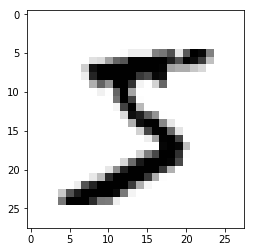

In [0]:
# Let's display first image from the training set with Matplotlib.
import matplotlib.pyplot as plt

# Function to display an image.
def display_image(img):
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()
  

display_image(x_1)

### Question
Write the code to look at the 11-th data point in the training set and display the number with the help of `imshow`. 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

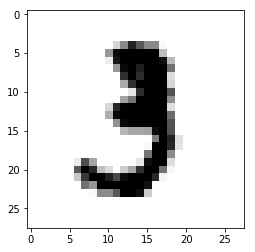

In [0]:
#@title Expand to check the solution
# Check out 11-th image in the training set.
i = 10
x_i = x_train[i]
print (x_i)
display_image(x_i)

## Select multiple data points
- : is used to select the entire axis.
- i:j is used to select $i$-th to$ j-1$-th data points.  Note that $j$-th point is not included.

In [0]:
# select data point from 10 to 100 (100 is not included)
x_train_slice = x_train[10:100]
# print(x_train_slice)

print ("Attributes of data slice tensor")
print ("===================================")
print ("Number of axes in tensor = %d"%x_train_slice.ndim)
print ("Shape of a tensor:", x_train_slice.shape)
print ("Data type of tensor elements: %s"%x_train_slice.dtype)


Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (90, 28, 28)
Data type of tensor elements: uint8


There are a few more equivalent ways of doing the same thing:

In [0]:
# Here we explicitely select the remaining two axes.
x_train_slice = x_train[10:100, :, :]

print ("Attributes of data slice tensor")
print ("===================================")
print ("Number of axes in tensor = %d"%x_train_slice.ndim)
print ("Shape of a tensor:", x_train_slice.shape)
print ("Data type of tensor elements: %s"%x_train_slice.dtype)

Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (90, 28, 28)
Data type of tensor elements: uint8


In [0]:
# Here we explicitely select the remaining two axes by specifying the first and the last elements.
x_train_slice = x_train[10:100, 0:28, 0:28]

print ("Attributes of data slice tensor")
print ("===============================")
print ("Number of axes in tensor = %d"%x_train_slice.ndim)
print ("Shape of a tensor:", x_train_slice.shape)
print ("Data type of tensor elements: %s"%x_train_slice.dtype)

Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (90, 28, 28)
Data type of tensor elements: uint8


## Questions:

(1) Write the code to select bottom right patch of 14x14 from the training images?

In [0]:
#@title Expand to see the answer.
x_train_br_slice = x_train[:, 14:, 14:]

print ("Attributes of data slice tensor")
print ("===============================")
print ("Number of axes in tensor = %d"%x_train_br_slice.ndim)
print ("Shape of a tensor:", x_train_br_slice.shape)
print ("Data type of tensor elements: %s"%x_train_br_slice.dtype)

Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (60000, 14, 14)
Data type of tensor elements: uint8


(2) Write the code to crop imags to patches of 14x14 pixel centered in the middle?

In [0]:
#@title Expand to see the answer.
x_train_br_slice = x_train[:, 7:-7, 7:-7]

print ("Attributes of data slice tensor")
print ("===============================")
print ("Number of axes in tensor = %d"%x_train_br_slice.ndim)
print ("Shape of a tensor:", x_train_br_slice.shape)
print ("Data type of tensor elements: %s"%x_train_br_slice.dtype)

Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (60000, 14, 14)
Data type of tensor elements: uint8


Since we consume data in batches during training (remember batch gradient descent?), let's understand how data batch tensors look like.

# Data Batches

We usually break the data into small batches and process those batches:

* The first axis in all data sensor is *sample axis* or *sample dimension*.  

* The first axis of batch tensor is called the *batch axis* or *batch dimension*.


In [0]:
# First batch - first 128 examples.  Each batch has 128 examples.
batch_1 = x_train[:128]
print ("Attributes of data slice tensor")
print ("===============================")
print ("Number of axes in tensor = %d"%batch_1.ndim)
print ("Shape of a tensor:", batch_1.shape)
print ("Data type of tensor elements: %s"%batch_1.dtype)

# Next batch - next 128 examples.
batch_2 = x_train[128:256]
print ("")
print ("Second batch:")
print ("Attributes of data slice tensor")
print ("===============================")
print ("Number of axes in tensor = %d"%batch_2.ndim)
print ("Shape of a tensor:", batch_2.shape)
print ("Data type of tensor elements: %s"%batch_2.dtype)


Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (128, 28, 28)
Data type of tensor elements: uint8

Second batch:
Attributes of data slice tensor
Number of axes in tensor = 3
Shape of a tensor: (128, 28, 28)
Data type of tensor elements: uint8


### Question:
Write the code to get $n$-th batch.

In [0]:
#@title Expand the cell to see the solution.

# Since the first batch starts at 0, in order to get n-th batch,
# we 
n = 5
batch_n = x_train[128*n:128*(n+1)]

print ("Attributes of data slice tensor")
print ("===============================")
print ("Number of axes in tensor = %d"%batch_n.ndim)
print ("Shape of a tensor:", batch_n.shape)
print ("Data type of tensor elements: %s"%batch_n.dtype)


# Real world examples of data tensors

| Tensor| Example                             | Shape                                                 | Dataset                                 | 
|------------|:---------------------------------------:| :-----------------------------------------------------| :----------------------------------------:|
| 2D        | Vector                                 |  `(samples, features)`  |  Text documents |
| 3D        | Timeseries or Sequence | `(samples, timesteps, features)` |  Stock Prices |
| 4D        | Images                               | `(samples, channels, height, width)`  |  MNIST Digit |                 
| 5D        | Videos                               | `(samples, frames, channels, height, width)` | Videos |




## Vector data

- Most commonly appearing tensor in ML
- Each point is encoded as a vector of features
- A batch of data can be encoded as a 2D tensor i.e. array of vectors
   - First axis is a `sample axis`
   - Second axis is a `feature axis` 
- What are the examples of such dataset?
   - Text documents: A set of k documents, each represented with `m` features
   - Fuel efficiency dataset: A set of automobiles and their features
 

## Timeseries and sequence data

We use 3D tensor for storing time-series and sequence data: `(samples, timesteps, features)`

### Stock prices dataset
- Every minute, we store features associated with that instance of time:  e.g. current price, the highest and the lowest price in the past minute. Thus every minute is encoded as a $m$-D vector, where $m$ is the number of features.  
- An entire day of trading is encoded as a 2D tensor of shape (390, $m$) (there are 390 minutes in a trading
day).
- 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, $m$). Here, each sample would be one day’s worth of data.


### Dataset of tweets
Tweet is encoded as a sequence of 280 characters.  
- At each position, one of the 128 unique characters is possible. Thus, each character can be encoded as a one-hot-encoding with 128 length vector. 
- Each tweet can be encoded as a 2D tensor of shape (280, 128).
- A dataset of 1000000 can be stored in 3D tensor of shape (1000000, 280, 128).

## Video data

- Stored as a 5D tensor of shape `(samples, frames, channels, height, width)`
- Each sample is a video encoded in 4D tensor of shape `(frames, channels, height, width)`
- Each frame in the video is encoded as a 3D tensor (just like images).  

#### Question
Deduce the shape of a tensor to store 4 videos, where each video is a 60-second clip of size 128x256 sampled at 4 frames a second?

Now that we have studied how the data is represented in tensor, let's explore how they are used in NN.

# Key operations in Neural Networks


In NN, we specify a layer with the following statement:

`tf.keras.layers.Dense(128, activation='relu')`

This layer takes 2D tensor as input and returns another 2D tensor as an output through the following function:

`output = relu(dot(w, input)+b)`

There are three operations here:
1. Linear combination of inputs and the corresponding weights: `dot(w, input)` where `w` is a weight vector and `input` is a feature vector.
2. Add bias to the calculation `dot(w, input)+b`
3. Finally apply a non-linear activiation on the result.  Here we have used `relu` as an activation function, which returns `max(x, 0)`.



Let $m$ be the size of the input to this layer.  Since it's a dense layer, each unit/neuron in this layer will receive $m$ inputs per sample.   
- For each neuron, we have $m$ weights, one corresponding to every input.  Thus for 128 units, we will have  $m$ weights.  `w` is a 2D tensor of shape $(128, m)$.
- Input `input` is a vector (2D tensor) with `sample` examples, each represented with $m$ features.
- Each unit in the dense layer has a bias term.   Hence `b` is a vector with 128 components. 


In [0]:
import numpy as np

In [0]:
w = np.array([[1, 0.5], [2, 1]])
print ("# of axes- w = %d"%w.ndim)
print ("Shape of w = ", w.shape)
print ()

input = np.array([[1, 2], [-1, 2]])
print ("# of axes- input = %d"%input.ndim)
print ("Shape input = ", input.shape)
print ()

b = np.array([-2.0, 0.5])
print ("# of axes- b = %d "%b.ndim)
print ("Shape of b = ", b.shape)

# of axes- w = 2
Shape of w =  (2, 2)

# of axes- input = 2
Shape input =  (2, 2)

# of axes- b = 1 
Shape of b =  (2,)


Let's apply linear combination

In [0]:
z = np.dot(w, input) + b              # Element-wise addition

print ("==================================================")
print ("Shape of w = ", w.shape)
print ("Shape input = ", input.shape)
print ("Shape of b = ", b.shape)
print ("==================================================")
print ("Shape of z = ", z.shape)
print ("==================================================")
print (z)


Shape of w =  (2, 2)
Shape input =  (2, 2)
Shape of b =  (2,)
Shape of z =  (2, 2)
[[-1.5  3.5]
 [-1.   6.5]]


Let's apply non-linear activation with `relu`:

In [0]:
output = np.maximum(0., z)                 # Element-wise relu
print ("Shape of output = ", output.shape)
print (output)

Shape of output =  (2, 2)
[[0.  3.5]
 [0.  6.5]]


Before that, we will visualize a few commonly used activations.

Text(0, 0.5, 'relu(x)')

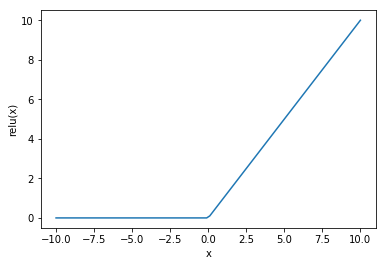

In [0]:
import matplotlib.pyplot as plt

# relu vialuzation
x = np.linspace(-10, 10, 100)
z = np.maximum(0., x)  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("relu(x)")

Text(0, 0.5, 'sigmoid(x)')

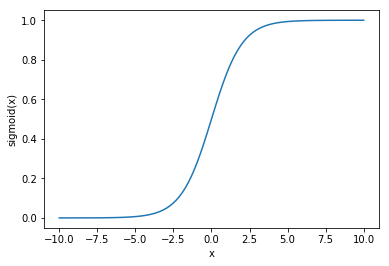

In [0]:
# Sigmoid activation
import math
x = np.linspace(-10, 10, 100)
z = 1/(1+np.exp(-x)) 

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

## Element-wise additions

Note that `relu` and tensor addition are both element-wise operations and hence can be parallelized.  The vectorized implementations exploit this characteristics for efficient implementations.

In [0]:
z = np.dot(w, input) + b
output = np.maximum(0, z)
print ("=========== z ============")
print (z)
print ("=========== output ============")
print (output)

=========== z ============
[[-1.5  3.5]
 [-1.   6.5]]
=========== output ============
[[0.  3.5]
 [0.  6.5]]


## Broadcasting

Employed to make two tensors involved in the operations compatible.  Concretely, let's say you want to add two tensors when their shaps differ:
1. Axes are added to the smaller tensor to match the `ndim` of the larger tensor.  These axes are called `broadcast axes`.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.


In [0]:
x_1 = np.random.rand(32, 10)
x_2 = np.random.rand(10,)

print ("Shape of x_1: ", x_1.shape)

print ("Original shape of x_2: ", x_2.shape)

# Broadcasting
# 1. Add an axis to match ndim of the larger tensor.
x_2 = np.expand_dims(x_2, axis=0)
print ("Shape of x_2 after adding a broadcast axis: ", x_2.shape)

# 2. Smaller tensor is repeated on the new axis.
x_2 = np.repeat(x_2, 32, axis=0)
print ("Shape of x_2 after broadcasting: ", x_2.shape)

Shape of x_1:  (32, 10)
Original shape of x_2:  (10,)
Shape of x_2 after adding a broadcast axis:  (1, 10)
Shape of x_2 after broadcasting:  (32, 10)


In actual implementation, the entries are not repeated, but the algorithms implements virtual repeatition operations.

In [0]:
#numpy implements broadcasting
x_1 = np.random.rand(32, 10)
x_2 = np.random.rand(10,)
print((x_1 + x_2).shape)

(32, 10)



##  Tensor dot

Tensor dot is not an elementwise operation.

In [0]:
def naive_vector_dot(x, y):
  # compatibility check: both x and y are vectors
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  
  # compatibility checks: vectors with the same number of elements
  assert x.shape[0] == y.shape[0]
  
  z = 0.
  
  # performs element-wise product and then adds it up
  for i in range(x.shape[0]):
    z += x[i] * y[i]
    
  # returns scalar
  return z

print (naive_vector_dot(np.array([1, 2]), np.array([1, 2])))

5.0


Matrix-vector dot product

In [0]:
def naive_matrix_vector_dot(x, y):
  # check: x is a matrix
  assert len(x.shape) == 2
  
  # check: y is a vector
  assert len(y.shape) == 1
  
  # check: make sure # of columns in x is equal to number of rows in y
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

print (naive_matrix_vector_dot(np.array([[1, 2], [1,2]]), np.array([1, 2])))

[5. 5.]


Note that as soon as one of the two tensors has an `ndim` greater than 1, `dot` is no longer symmetric, which is to say that `dot(x, y)` isn’t the same as `dot(y, x)`.

Let's look at the Numpy implementation of dot.

In [0]:
import numpy as np
z = np.dot(np.array([1, 2]), np.array([1, 2]))
print (z)

5


## Tensor Reshaping

Reshaping is used to rearrange rows and columns of tensor to match the shape of target tensor.  The reshaped tensor has the same number of elements as the initial tensor. 

It is mainly used in data preprocessing.

In [0]:

x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print ("x =", x)

print("Shape of x:", x.shape)
print(x.shape)
print ("===========")

# Reshaping the tensor to a 

x = x.reshape((6, 1))
print ("x after reshaping to (6,1)")
print ("x =", x)

print ("New shape of x:", x.shape)
print ("===========")

x = x.reshape((2, 3))
print ("x after reshaping to (2,3)")
print ("x =", x)

print ("New shape of x", x.shape)
print ("===========")

x = [[0. 1.]
 [2. 3.]
 [4. 5.]]
Shape of x: (3, 2)
(3, 2)
x after reshaping to (6,1)
x = [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
New shape of x: (6, 1)
x after reshaping to (2,3)
x = [[0. 1. 2.]
 [3. 4. 5.]]
New shape of x (2, 3)


Transposition is a special case of reshaping.

In [0]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


# Neural net training



## Gradient based optimization

Each layer in the neural network uses the following function to transform the input to the output:

`output = relu(dot(W, input) + b)`

In this expression, `W` and `b` are trainable parameter or weights of the layer.  They are called *kernels* and *bias* in the context of Keras API.

We randomly initialize `W` and `b` to *small random values*.  Avoid initializing all parameters to 0 or any other numbers.  The training loop has the following steps:
1. Draw a batch of training samples `x` and corresponding targets `y`.
2. Run the network on `x` to obtain predictions `y_pred`.
3. Compute the loss of the network on the batch, a measure of the mismatch
between `y_pred` and `y`.
4. Compute the gradient of the loss with respect to the network’s parameters (a
backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for
example `W -= step * gradient`—thus reducing the loss on the batch a bit


## Momentum based optimizers

**Show the intuition of the approach with an analogy to the ball rolling down the slope.**

Neural network loss function is full of lots of local minimas.  Once the algorithm reaches one of these local minimas, it is hard to come out of that.  In such cases, momentum based methods come to our rescue.

The momentum based methods draws inspiration from physics.  Intuition based on the drawing: A ball rolling down the loss curve, if it has got sufficient momentum, it won't get stuck in local minima.  

We use current slope (current  accelaration) and velocity based on past accelerations.

In [0]:
past_velocity = 0.

# Constant momentum factor
momentum = 0.1

while loss > 0.01:
  w, loss, gradient = get_current_parameters()
  
  velocity = past_velocity * momentum + learning_rate * gradient
  
  # Get the new value for w based on momentum.
  w = w + momentum * velocity - learning_rate * gradient
  
  # Update velocity
  past_velocity = velocity
  update_parameter(w)

# Revisit the Hello World TF Model

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
print("Training Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_train.ndim)
print("Tensor shape: ", x_train.shape)
print("Data type: %s"%x_train.dtype)
print("=======================")
print()
print("Test Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_test.ndim)
print("Tensor shape: ", x_test.shape)
print("Data type: %s"%x_test.dtype)


Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training:

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

Now you understand that this network consists of a chain of two Dense layers, that
each layer applies a few simple tensor operations to the input data, and that these
operations involve weight tensors. Weight tensors, which are attributes of the layers,
are where the knowledge of the network persists.

In [0]:
model.summary()

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now you understand that 
* `sparse_categorical_crossentropy` is the loss function that’s used as a feedback signal for learning the weight tensors,  and which the training phase will attempt to minimize.   We used this loss function since our output are integers between 0 to 9.
* This reduction of the loss happens via minibatch stochastic gradient descent.  
* The exact rules governing a specific use of gradient descent are defined by the `adam` optimizer passed as the first argument.

Train and evaluate the model:

In [0]:
model.fit(x_train, y_train, epochs=5)

## TODO: make sure the batch size is accurate here.

Now you understand what happens when you call fit: 
* The network will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over
all the training data is called an epoch). 
* At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights
accordingly.
* After these 5 epochs, the network will have performed 2,345 gradient updates (469 per epoch), and the loss of the network will be 
sufficiently low that the network will be capable of classifying handwritten digits with high accuracy.

In [0]:
# todo: show how prediction works on a single image and a batch of images

# Summary

In this module,  we studied mathematical foundations of deep learning.  You now have understanding of 
- Tensors
- Input data representation with tensors
- Data batches in tensors
- Key operations in neural network and their low level details
- Neural network training